In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.odr import * 

In [2]:
data = pd.read_csv('isocro.csv', header = 0)
data.tail()

,Full,log(Age),M,log(Teff),Mbol,Mv,(U-B)o,(B-V)o,(V-R)o,(V-I)o,(V-J)o
6556,6557,6.6,51.8303,4.306,-9.88,-7.96,-0.88,-0.21,-0.09,-0.21,-0.51
6557,6558,6.6,51.8353,4.238,-9.89,-8.36,-0.81,-0.18,-0.06,-0.16,-0.42
6558,6559,6.6,51.8403,4.173,-9.90,-8.73,-0.69,-0.16,-0.05,-0.12,-0.33
6559,6560,6.6,51.8453,4.069,-9.92,-9.32,-0.44,-0.12,-0.02,-0.05,-0.19
6560,6561,6.6,51.8503,3.980,-9.93,-9.75,-0.21,-0.05,0.01,0.02,-0.02


In [3]:
idades = data['log(Age)']
age = np.array([])
for element in idades:
    if element in age:
        continue
    elif element not in age:
        age = np.append(age,element)

In [4]:
Mvarray = []
Bvarray = []
for element in age:
    a = data[data['log(Age)']==element]
    b = a['Mv'].tolist()
    c = a['(B-V)o'].tolist()
    Mvarray.append(b)
    Bvarray.append(c)

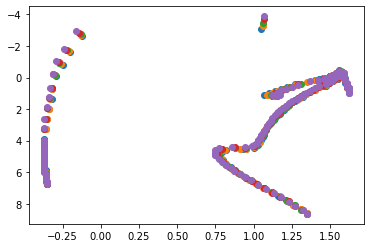

In [5]:
plt.gca().invert_yaxis()
for i in range(1,6):
    plt.scatter(Bvarray[i],Mvarray[i])

In [6]:
from scipy import stats

#REGRESSAO SEM SIGMA CLIPPING
f = open("Regression_Iso(No_SigmaClipping).txt", "w")
f.write("Age,Slope,Intercept,Slope_Error,Intercept_Error,R_Value,BvTof,MvTof \n")
for i in range(0,len(age)):
    lx = Bvarray[i]
    ly = Mvarray[i]
    a = 0
    index = 0
    for element in lx:
        if a>= 1:
            if lx[a-1] - element <0:
                index = a-1
                break
        a+=1

    valor = lx[index]
    b = 0
    for element in lx:
        if element == valor:
            index = b
            break
        b+=1
    x1 = lx[:index]
    y1 = ly[:index]
    
    Bvturnoff = lx[index]
    Mvturnoff = ly[index]
    
    result = stats.linregress(x1,y1)
    f.write(str(age[i]) + ', ' + str(result.slope) + ', ' + str(result.intercept) + ', ' + str(result.stderr) + ', ' + str(result.intercept_stderr) +  ', ' + str(result.rvalue)  +  ', ' + str(Bvturnoff) + ', ' + str(Mvturnoff) + '\n')
f.close()
    


In [7]:
def linear_func(p, x):
    m, c = p
    return m*x + c

In [8]:
from scipy import stats
f = open("Regression_Iso.txt", "w")
f.write("Age,Slope,Intercept,Slope_Error,Intercept_Error,R_Value,(B-V)TurnOff,MvTurnOff, Ajustadas/Total\n")
for i in range(0,len(age)):
    lx = Bvarray[i]
    ly = Mvarray[i]
    a = 0
    index = 0
    for element in lx:
        if a>= 1:
            if lx[a-1] - element <0:
                index = a-1
                break
        a+=1

    valor = lx[index]
    b = 0
    for element in lx:
        if element == valor:
            index = b
            break
        b+=1
    x1 = lx[:index] #indice [:index] eh para pegar estrelas ate o turn off point. turn off point definido na iteracao acima.
    y1 = ly[:index]
    Bvturnoff = lx[index]
    Mvturnoff = ly[index]
    result = stats.linregress(x1,y1)
    coef = np.array([result.slope,result.intercept]) #criando arrays para popt
    error = np.array([result.stderr, result.intercept_stderr]) #criando arrays para perr
    
    sigma = 1
    up = coef + sigma*error
    down = coef - sigma*error
    
    x1 = np.asarray(x1) #para tirar o xmin e xmax no tfit, tem que ser np.array
    y1 = np.asarray(y1)

    tfit = np.linspace(x1.min(),x1.max(),len(x1))
    fitup = linear_func(up,tfit)
    fitdown = linear_func(down,tfit)
    mup, bup = up[0],up[1]
    mdw, bdw = down[0], down[1]

    xadj = []
    yadj = []

    for a,b in zip(x1,y1):
        if (a*mup + bup) >= b and (a*mdw + bdw) <= b:
            xadj.append(a)
            yadj.append(b)
    xadj = np.asarray(xadj)
    yadj = np.asarray(yadj)
    
    razao = str(len(xadj)/len(x1)) + '= ' + str(len(xadj)) + '/' + str(len(x1))
    final_regression = stats.linregress(xadj,yadj)
    
    f.write(str(age[i]) + ', ' + str(final_regression.slope) + ', ' +  str(final_regression.intercept) + ', ' + str(final_regression.stderr) + ', ' + 
            str(final_regression.intercept_stderr) +  ', ' + str(final_regression.rvalue) + ', '+ str(Bvturnoff) + ', ' + str(Mvturnoff) + ', ' + razao + '\n')
f.close()
    
